In [1]:
import json
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction

In [15]:
data_r3 = []
data_r4 = []
data_r5 = []
for i in range(3, 6):
    for j in range(1, 6):
        with open('/Users/minoh/Documents/Usyd2018-2/COMP5703_Capstone/data/r%d/%d.json'%(i, j),'r') as d:  #modify path
            tem_data = json.load(d)
        if i == 3:
            data_r3.extend(tem_data['result']['docs'])
        elif i == 4:
            data_r4.extend(tem_data['result']['docs'])
        else:
            data_r5.extend(tem_data['result']['docs'])
    

In [16]:
print(len(data_r3))
print(len(data_r4))
print(len(data_r5))

1501
1459
1989


In [18]:
# Delete duplicate json objects

def deleteDuplicate(data):
    all_data = [ each['content'] for each in data ] 
    unique = [ data[ all_data.index(id) ] for id in set(all_data) ]
    return unique



In [19]:
unique_r3 = deleteDuplicate(data_r3)
unique_r4 = deleteDuplicate(data_r4)
unique_r5 = deleteDuplicate(data_r5)

print(len(unique_r3))
print(len(unique_r4))
print(len(unique_r5))


661
620
880


In [24]:
# Extract content and metatdata from json 

title = []
content = []
publishedDate = []
summary = []
domain = []
#adultLanguage = [] no 'true' in our dataset


for i in range(len(unique_r3)):
    if 'title' in unique_r3[i]:
        title.append(unique_r3[i]['title'])
    else:
        title.append('')
    if 'content' in unique_r3[i]:
        content.append(unique_r3[i]['content'])
    else: 
        content.append('')
    if 'publishedDate' in unique_r3[i]:
        publishedDate.append(unique_r3[i]['publishedDate'])
    else:
        publishedDate.append('')
    if 'summary' in unique_r3[i]:        
        summary.append(unique_r3[i]['summary'])
    else:
        summary.append('')
        
    for j in range(len(unique_r3[i]['indexTerms'])):
        domain.append(unique_r3[i]['indexTerms'][j]['name'])
    
    #if 'adultLanguage' in unique_r3[i]:
    #    adultLanguage.append(unique_r3[i]['adultLanguage'])
   # else:
    #    adultLanguage.append('')

In [25]:
print(len(content), len(title), len(adultLanguage), title[5])

661 661 1322 Man reveals bank's pressure to sell farm


In [22]:
content[0]

'Politics Show subsections \n\nBusiness Hide subsections \n\nWorld Show subsections \n\nNational Show subsections \n\nSport Show subsections \n\nEntertainment Show subsections \n\nLifestyle Show subsections \n\nMoney Show subsections \n\nEnvironment Show subsections \n\nThe Sydney Morning Herald Normal text sizeLarger text sizeVery large text size \n\nIt all started to go wrong for Catherine Brenner the day that Jack Regan walked into the witness box at the Financial Services Royal Commission in Melbourne. \n\nThe date was Monday, April 16, and Regan, the head of advice at financial giant AMP, was due to give his much-anticipated evidence under the hawk-eyed gaze of presiding justice Kenneth Hayne. \n\nForty-seven year old Brenner, the well-remunerated chairman of AMP, logged on to follow the webcast live from Japan. \n\nFormer AMP chair Catherine Brenner. \n\nPhoto: Peter Braig \n\nShe, her husband Phillip Brenner, a former medical specialist, and their three daughters aged 15, 13 and

In [26]:
# load nltk's English stopwords as variable called 'stopwords'
#nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

In [54]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [29]:
# Define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [30]:
#use extend so it's a big flat list of vocab
nltk.download('punkt')
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in content:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'content', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

[nltk_data] Downloading package punkt to /Users/minoh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
# create a pandas DataFrame with the stemmed vocabulary as the index and the tokenized words as the column. 
# an efficient way to look up a stem and return a full token

vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 422896 items in vocab_frame


In [33]:
print(vocab_frame.head())

           words
westpac  westpac
fought    fought
and          and
won          won
a              a


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.70,
                                 min_df=2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(content) #fit the vectorizer to content

print(tfidf_matrix.shape)

CPU times: user 11.5 s, sys: 78.7 ms, total: 11.6 s
Wall time: 11.6 s
(661, 62901)


In [57]:
terms = tfidf_vectorizer.get_feature_names()

In [58]:
print(terms)
print(tfidf_matrix)
#Still has 's, atustraila, commission, etc... REMOVE THOSE WORDS

["'a", "'d", "'d buy", "'d buy motley", "'d like", "'d think", "'d think loan", "'i", "'m", "'m realli", "'m realli pleas", "'m sure", "'m sympathet", "'m sympathet object", "'m today", "'m today becaus", "'m told", "'m told lowest", "'m uncomfort", "'m uncomfort parent", "'m veri", "'s", "'s abil", "'s absolut", "'s accept", "'s accept custom", "'s account", "'s action", "'s activ", "'s activ account", "'s actual", "'s actual good", "'s admiss", "'s admiss financi", "'s advoc", "'s advoc klein", "'s afstyla", "'s afstyla product", "'s aggress", "'s alreadi", "'s alway", "'s amp", "'s announc", "'s announc australian", "'s announc incred", "'s annual", "'s annual general", "'s annual report", "'s anoth", "'s approach", "'s approach credit", "'s approv", "'s approv code", "'s argu", "'s argu royal", "'s ash", "'s ash product", "'s assess", "'s assess suitabl", "'s asset", "'s assur", "'s assur busi", "'s attempt", "'s attempt charg", "'s audienc", "'s audienc segment", "'s australia", "

In [61]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)


In [62]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(100, 200)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=title);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
#plt.savefig('ward_clusters.png', dpi=300) #save figure as ward_clusters

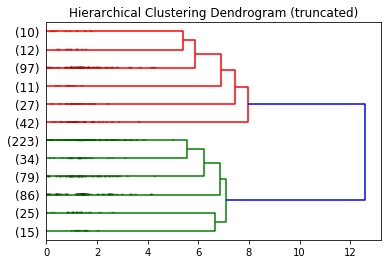

In [70]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
dendrogram(
    linkage_matrix, 
    orientation="right",
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

# Numbers in () is the number of documents in each cluster

In [78]:
# Retrieve the clusters

from scipy.cluster.hierarchy import fcluster
k=12
clusters = fcluster(linkage_matrix, k, criterion='maxclust')
print(clusters)
print(len(clusters))

[ 3 11  6  6  4 10  6 10  3  6  1  6  6  4 10  3  3 10  6 11  2 10  6  4
  3 10  5  6  3 12  6 11 10  8  3  6  5  7  6  6  3  5 10  6  6  3  6 10
  6  6  3  4  6  6  5  7 10  8 10  6  4  7  8  4 10  6 10  6  4  8  6  3
  3  6  6  1  6  6  5  4  8  6 10  4  4 10 12 10  3  6 10  4  5  6  9  5
  2  3 11 10  4  6  3  4  8  8  7 10  6  6  6  6  6  3  2  6  6  2  3  6
  6  6  7  2  6  6  6  5  6  5  1  4  6  2  6  3  6  3  6  5  6  6  3 10
  3  6  4  8  6  5  4  6  3  6  6  3  8 10  3  3 10  5  4  4  4  3  6 10
 10  4 10  7  3  7  7  4  6 11  3  6 10  2  3  3  7  6  6  6  6 10  5  2
  7  6  7  2  6  5  6  5 10  6  3  6  4 10  6  6 10 10  7  2  7  2  6  3
 10  9  3  8  3  3  6  3  4  6  6  6  3  4 10 12  9  4  6  6  4 11  6  3
  6  4  6  5  6  6  7  6 11  5  6  4  1  3  5  5  6  6  3 10  5  6  4  3
  4 10  1  6  8 12  2 10  3  7  7  6  4  5 10  9  4 10 12  6 10 10  7  3
 10  1 10  3 10  8 10  7  6  3  5  3  6  8  7  6  6  3 10 10  6  4  6  6
  4  3  8  8  6  4  6  3  5  7  8  6  3 10  8  3 11